# Modelling Heart Disease

## Using Logistic regression, Model Evaluation, Model Optimization

### In this project we:
* Create logistic regression model to predict the probability of having heart disease
* Use random forest classification to determine feature importance in order to optimize model

### Goal of the project:
Utilize heart-disease dataset provided by Kaggle.com to determine the likelihood of having heart disease. The dataset will be split into training and test sets while using cross-validation to determine model performance. Model performance will be evaluated by model accuaracy/predicatiblity scores.

## Project setup
### 1. Importing modules and functions

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
import seaborn as sns

### 2. Reading heart-disease dataset

In [6]:
df = pd.read_csv('heart.csv')

### 3. Describing the data

In [4]:
print(df.shape)
print(df.columns)
df.head(2)

(303, 14)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4. Variable information
Each row corresponds to a particular individual with 14 variables:
* age : age in years
* sex : (1 = male; 0 = female)
* cp : chest pain type
* trestbps : resting blood pressure (in  mm Hg on admission to the hospital
* chol : serum cholestoral in mg/dl
* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg : resting electrocardiographic results
* thalach : maximum heart rate achieved
* exang : exercise induced angina (1 = yes; 0 = no)
* oldpeak : ST depression induced by exercise relative to rest
* slope : the slope of the peak exercise ST segment
* ca : number of major vessels (0-3) colored by flourosopy
* thal : 3 = normal; 6 = fixed defect; 7 = reversable defect
* target : (1 = yes; 0 = no)

### 5. Check if there are missing values

In [6]:
df.isnull().values.any()

False

## Exploratory Analysis

### 1. Data visualization

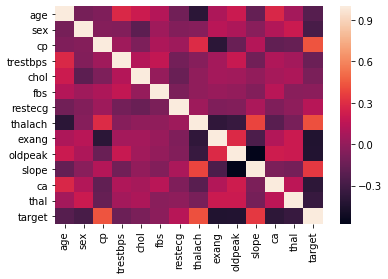

In [7]:
sns.heatmap(df.corr())

In [8]:
#sns.pairplot(df)

## Data Wrangling

### 1. Create dummy variables for categorical variables

In [9]:
df_ = df

In [10]:
cat_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
def create_dummies(data, features):
    for i in features:
        dummies = pd.get_dummies(data=data[i], drop_first=True, prefix=i)
        data = pd.concat([data, dummies], axis=1)
        del data[i]
    return data
df_ = create_dummies(df_, cat_features)

In [11]:
df_.head(2)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_1,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,0,0,0,0,0,0,0,1,0


## Logistic Regression and Model Evaluation

### 1. Create Logistic regression model

In [12]:
X = df_.drop(labels='target', axis=1)
y = df_.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

logit = LogisticRegression(solver='lbfgs', max_iter=2000, random_state=0)

model = logit.fit(X_train, y_train)
model.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

In [13]:
print("Model accuracy on training data:", model.score(X_train, y_train))

Model accuracy on training data: 0.896551724137931


In [14]:
coef_ = model.coef_
coef = pd.DataFrame(data=coef_, columns=X.columns)
print(model.intercept_)
coef

[-0.11527241]


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.024573,-1.367559,-0.019231,-0.00474,-0.307813,0.028034,-0.529217,-0.433738,0.526072,1.217753,...,-0.11283,-0.384997,0.221806,-1.446224,-1.489731,-1.289884,0.330422,0.239945,0.722821,-0.791622


### 2. 10-fold cross-validation on *Test* set

In [15]:
scores = cross_val_score(estimator=model, X=X_test, y=y_test, cv=10)
scores

array([0.81818182, 1.        , 0.9       , 0.6       , 0.7       ,
       0.6       , 0.8       , 0.9       , 0.55555556, 0.77777778])

In [16]:
y_pred = model.predict(X_test)
print("Model predictions:\n", pd.DataFrame(y_pred)[0].value_counts(), "\n")
print("Actual target values:\n", y_test.value_counts())

Model predictions:
 1    53
0    47
Name: 0, dtype: int64 

Actual target values:
 1    52
0    48
Name: target, dtype: int64


### 3. Class probabilities on *Test* set

In [17]:
test_prob = model.predict_proba(X_test)
test_prob[0:3]

array([[0.89522283, 0.10477717],
       [0.59909667, 0.40090333],
       [0.62903031, 0.37096969]])

In [18]:
confusion_matrix(y_test, y_pred)

array([[39,  9],
       [ 8, 44]], dtype=int64)

### 4. Evaluate model

In [19]:
print("The average mean accuracy of 10-fold cross-validation:", scores.mean())
print("The standard deviation of the 10-fold cross-validation score:", scores.std())
print("The model accuracy on training data:", model.score(X_train, y_train))

The average mean accuracy of 10-fold cross-validation: 0.7651515151515151
The standard deviation of the 10-fold cross-validation score: 0.14086636331299707
The model accuracy on training data: 0.896551724137931


There is significant deviation between the results of the training data and the test data scores with the training data score being higher than the test data scores. This would suggest that the model is overfitting.

## Model Optimization using Random Forest feature selection

The reason for feature selection is to reduce the dimensionality of the data and attempt to explain the data with fewer features. With 

### 1. Create feature importance classifier

In [20]:
rf = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model_rf = rf.fit(X_train, y_train)
model_rf = SelectFromModel(model_rf, prefit=True)
feature_idx = model_rf.get_support()
feature_names = X.columns[feature_idx]
feature_names

Index(['thalach', 'exang', 'oldpeak', 'slope_2', 'thal_2', 'thal_3'], dtype='object')

In [21]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)>

### 2. Create optimized model

In [22]:
clf = Pipeline([
    ('feature selection', SelectFromModel(rf)),
    ('classification', logit)
])
model_opt = clf.fit(X_train, y_train)
print("Model accuarcy after optimization on training data:", model_opt.score(X_train, y_train))

Model accuarcy after optimization on training data: 0.8078817733990148


In [23]:
y_optpred = model_opt.predict(X_test)
confusion_matrix(y_true=y_test, y_pred=y_optpred)

array([[33, 15],
       [ 7, 45]], dtype=int64)

### 3. 10-fold cross-validation on *Test* set

In [24]:
scores_opt = cross_val_score(estimator=model_opt, X=X_test, y=y_test, cv=10)
scores_opt

array([0.81818182, 1.        , 1.        , 0.8       , 0.7       ,
       0.7       , 0.7       , 0.8       , 0.55555556, 0.77777778])

### 4. Class probabilities on *Test* set

In [25]:
test_optprob = model_opt.predict_proba(X_test)
test_optprob[0:3]

array([[0.95758096, 0.04241904],
       [0.56545914, 0.43454086],
       [0.47970687, 0.52029313]])

### 5. Evaluate model

In [26]:
print("The average mean accuracy of 10-fold cross-validation:", scores_opt.mean())
print("The standard deviation of the 10-fold cross-validation score:", scores_opt.std())
print("The optimized model accuracy on training data:", model_opt.score(X_train, y_train))

The average mean accuracy of 10-fold cross-validatioon: 0.785151515151515
The standard deviation of the 10-fold cross-validation score: 0.12975851304237684
The optimized model accuracy on training data: 0.8078817733990148


Though there is a decrease in model accuracy on training data, the model is more consistent than using the default logistic parameters. This would suggest that the model is no longer overfitted.

In [27]:
print(classification_report(y_test, y_optpred))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        48
           1       0.75      0.87      0.80        52

    accuracy                           0.78       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100



In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.83      0.85      0.84        52

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



## K-NN Classification and Model Evaluation
### 1. Create K-NN Model

In [58]:
def k_neighbors(k_values, weight_types):
    best_score = 0
    best_k = int()
    best_weight = str()
    for w in weight_types:
        for k in k_values:
            knn = KNeighborsClassifier(n_neighbors=k, weights=w)
            
            knn_model = knn.fit(X_train, y_train)
            
            y_pred_knn = knn_model.predict(X_test)
            knn_scores = cross_val_score(estimator=knn_model, X=X_test, y=y_test, cv=10)
            
            if best_score < knn_scores.mean():
                best_score = knn_scores.mean()
                best_knn = knn_model.score(X_train, y_train)
                best_k = k
                best_weight = w
                confusion = confusion_matrix(y_test, y_pred_knn)
            
    print("K_neighbor", best_k, "with weight", best_weight)
    print("The model accuracy on training data:", best_knn)
    print("The average mean accuracy of 10-fold cross-validation:", best_score)
    print(confusion)

### 2. Evaluate Model

In [59]:
k_neighbors(k_values = range(1,50), weight_types = ['uniform', 'distance'])

K_neighbor 29 with weight uniform
The model accuracy on training data: 0.6995073891625616
The average mean accuracy of 10-fold cross-validation: 0.6801010101010101
[[29 19]
 [ 9 43]]


### 3. Create optimized model

In [57]:
knn = KNeighborsClassifier(n_neighbors=29, weights='uniform')

knn_clf = Pipeline([
    ('feature selection', SelectFromModel(rf)),
    ('classification', knn)
])
knn_model_opt = knn_clf.fit(X_train, y_train)
knn_scores_opt = cross_val_score(estimator=knn_model_opt, X=X_test, y=y_test, cv=10)

print("Model accuarcy after optimization on training data:", knn_model_opt.score(X_train, y_train))
print("The average mean accuracy of 10-fold cross-validatioon:", knn_scores_opt.mean())

Model accuarcy after optimization on training data: 0.7192118226600985
The average mean accuracy of 10-fold cross-validatioon: 0.6667676767676768


Using the features selected by the random forest for KNN there is an opposite affect on testing accuracy. Training accuracy increased with a decrease in testing accruacy. This would indicate slight overfitting. As a result, it is best to not implement feature selection on KNN classifier.